In [1]:
# IMPORT DEPENDENCIES

In [2]:
# Python
import pandas as pd
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [3]:
# upgrading Jupyter notebook for 'plotly' to work
!pip install --upgrade jupyter


In [4]:
# READ IN DATA

In [5]:
Sales_Dataframe = pd.read_csv('sales data-set.csv')

In [6]:
# ANALYZING DATAFRAME

In [7]:
# head of dataframe
Sales_Dataframe.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
# tail of dataframe
Sales_Dataframe.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [9]:
# information of dataframe
Sales_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
# check datatypes 
print(Sales_Dataframe.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


In [12]:
# statistically summary of dataframe
Sales_Dataframe.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [13]:
# CLEANING DATAFRAME

In [14]:
# checking empty cells/rows
Sales_Dataframe.isna()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
421565,False,False,False,False,False
421566,False,False,False,False,False
421567,False,False,False,False,False
421568,False,False,False,False,False


In [15]:
# checking empty or null_values in columns
Sales_Dataframe.isna().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
dtype: bool

In [16]:
# checking duplicates in rows/cells
Sales_Dataframe.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Length: 421570, dtype: bool

In [17]:
# checking duplicates in columns
Sales_Dataframe.duplicated().any()

False

In [18]:
# renaming needed columns in dataframe
Sales_Dataframe.rename({'Date':'ds','Weekly_Sales':'y'},axis=1,inplace=True)

In [19]:
# check columns in dataframe
Sales_Dataframe.columns

Index(['Store', 'Dept', 'ds', 'y', 'IsHoliday'], dtype='object')

In [22]:
# cleaning wrong format

Sales_Dataframe['ds'] = pd.to_datetime(Sales_Dataframe['ds'], format="%d/%m/%Y") # convert to date(datatype)/ format

In [23]:
# recheck datatypes
print(Sales_Dataframe.dtypes)

Store                 int64
Dept                  int64
ds           datetime64[ns]
y                   float64
IsHoliday              bool
dtype: object


In [24]:
# TRAIN MODEL USING 'PROPHET'  FOR FORECASTING 

In [25]:
m = Prophet(interval_width=0.5,daily_seasonality=True)

In [26]:
# FIT MODEL

In [27]:
m.fit(Sales_Dataframe)

19:26:04 - cmdstanpy - INFO - Chain [1] start processing
19:26:36 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# FORECASTING AWAY

In [30]:
future = m.make_future_dataframe(periods=360,freq='D')

In [31]:
# PREDICT 'future'

In [32]:
forecast = m.predict(future)

In [33]:
# PRINT HEAD OF 'forecast'
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,23187.985638,835.291753,30632.648738,23187.985638,23187.985638,-6757.342338,-6757.342338,-6757.342338,-6946.019994,-6946.019994,-6946.019994,188.677656,188.677656,188.677656,0.0,0.0,0.0,16430.643300
1,2010-02-12,23132.238974,2198.895910,31727.403015,23132.238974,23132.238974,-6565.679812,-6565.679812,-6565.679812,-6946.019994,-6946.019994,-6946.019994,380.340182,380.340182,380.340182,0.0,0.0,0.0,16566.559161
2,2010-02-19,23076.492309,685.718063,31031.286724,23076.492309,23076.492309,-7022.860848,-7022.860848,-7022.860848,-6946.019994,-6946.019994,-6946.019994,-76.840854,-76.840854,-76.840854,0.0,0.0,0.0,16053.631461
3,2010-02-26,23020.745644,1702.666590,31500.212548,23020.745644,23020.745644,-7386.467385,-7386.467385,-7386.467385,-6946.019994,-6946.019994,-6946.019994,-440.447391,-440.447391,-440.447391,0.0,0.0,0.0,15634.278259
4,2010-03-05,22964.998979,-2222.788931,30806.176844,22964.998979,22964.998979,-7428.473124,-7428.473124,-7428.473124,-6946.019994,-6946.019994,-6946.019994,-482.453130,-482.453130,-482.453130,0.0,0.0,0.0,15536.525855


In [34]:
# PRINT TAIL OF 'forecast'

In [35]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
498,2013-10-17,23962.462326,2219.835310,32197.307697,22774.717515,24933.101826,-7898.263322,-7898.263322,-7898.263322,-6946.019994,-6946.019994,-6946.019994,-952.243328,-952.243328,-952.243328,0.0,0.0,0.0,16064.199004
499,2013-10-18,23964.142376,2193.685669,31569.885858,22775.076884,24943.072851,-7941.541857,-7941.541857,-7941.541857,-6946.019994,-6946.019994,-6946.019994,-995.521862,-995.521862,-995.521862,0.0,0.0,0.0,16022.600519
500,2013-10-19,23965.822425,1111.507954,30840.874857,22775.272525,24953.043877,-7983.424877,-7983.424877,-7983.424877,-6946.019994,-6946.019994,-6946.019994,-1037.404883,-1037.404883,-1037.404883,0.0,0.0,0.0,15982.397548
501,2013-10-20,23967.502475,-1270.543218,30771.078174,22775.068879,24961.584674,-8021.801241,-8021.801241,-8021.801241,-6946.019994,-6946.019994,-6946.019994,-1075.781246,-1075.781246,-1075.781246,0.0,0.0,0.0,15945.701234
502,2013-10-21,23969.182524,1080.070666,28138.305627,22771.278832,24968.769277,-8054.599658,-8054.599658,-8054.599658,-6946.019994,-6946.019994,-6946.019994,-1108.579664,-1108.579664,-1108.579664,0.0,0.0,0.0,15914.582866


In [36]:
# PLOT 'forecast'

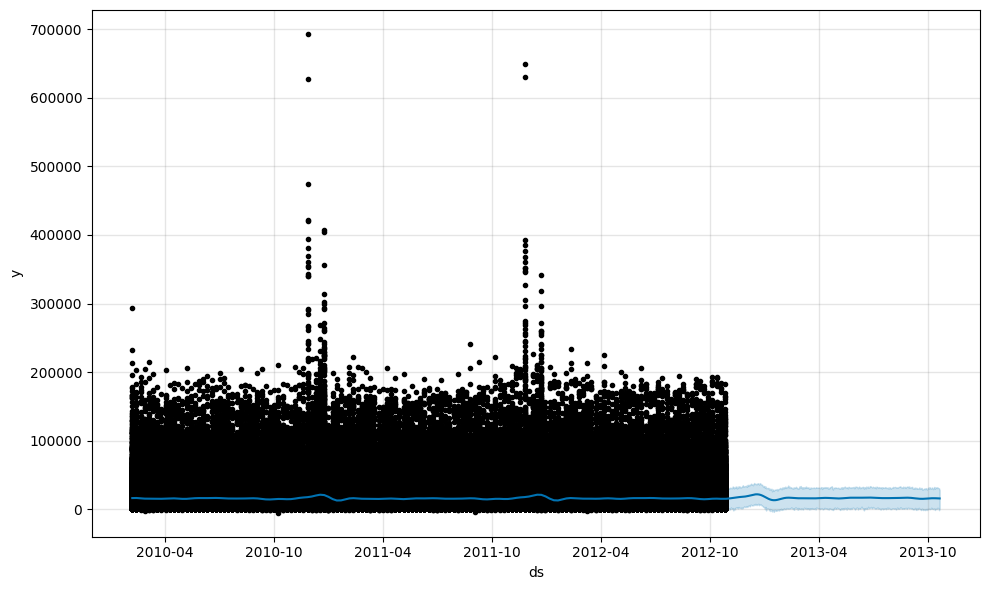

In [37]:
First_Plot = m.plot(forecast)

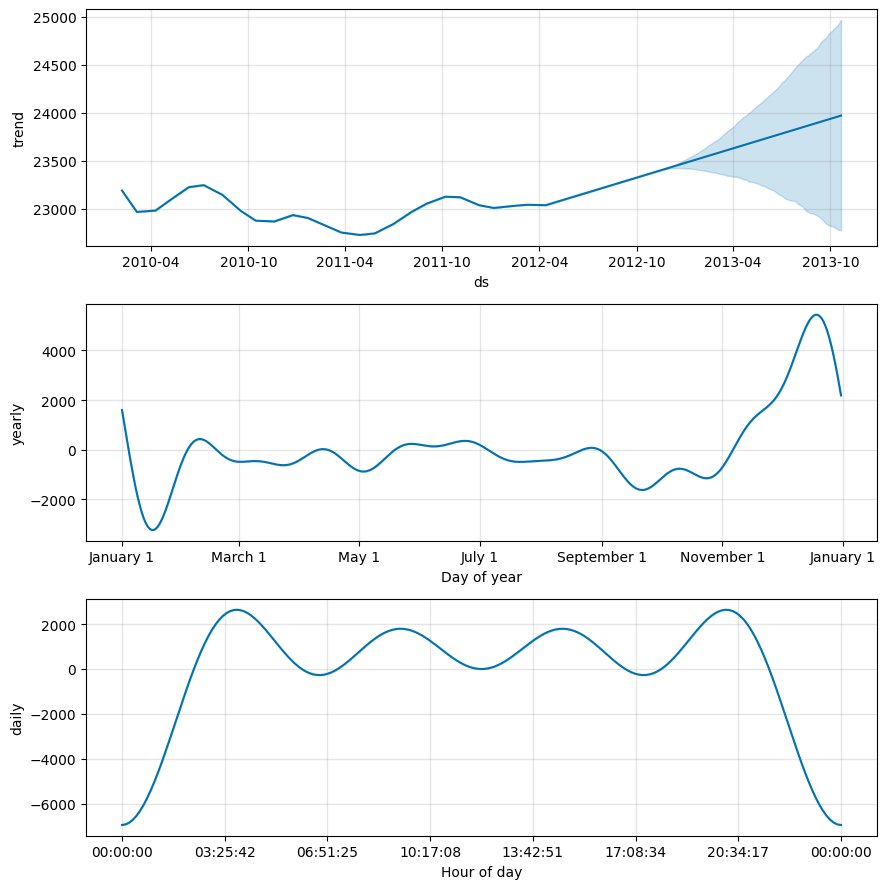

In [38]:
Second_Plot = m.plot_components(forecast)